<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4627 entries, 1999-03-11 to 2017-07-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4627 non-null   float64
 1   High       4627 non-null   float64
 2   Low        4627 non-null   float64
 3   Close      4627 non-null   float64
 4   Adj Close  4627 non-null   float64
 5   Volume     4627 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 253.0 KB
None
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1999-03-11  1.167969  1.562500  1.167969  1.464844   1.150338  86256000
1999-03-12  1.468750  1.523438  1.343750  1.457031   1.144202  19948800
1999-03-15  1.460938  1.460938  1.316406  1.324219   1.039905   6336000
1999-03-16  1.335938  1.382813  1.312500  1.312500   1.030702   4992000
1999-03-17  1.312500  1.398438  1.304688  1.320313   1.036838   772

<ipython-input-1-121be49fc780>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


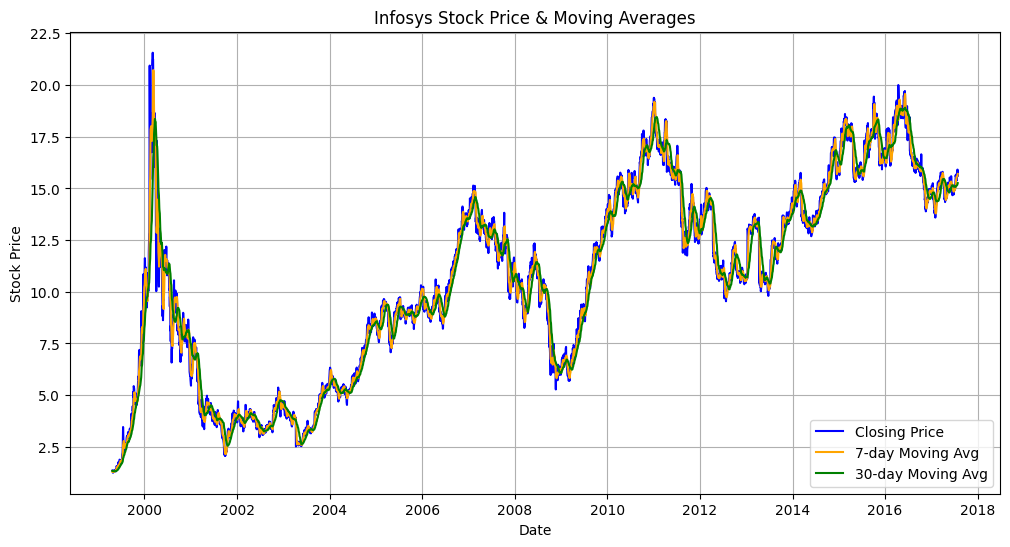

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/INFY.csv", parse_dates=["Date"], index_col="Date")

# Display basic info
print(df.info())
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values (if any) using forward fill method
df.fillna(method='ffill', inplace=True)

# Ensure data types are correct
df["Open"] = pd.to_numeric(df["Open"], errors="coerce")
df["High"] = pd.to_numeric(df["High"], errors="coerce")
df["Low"] = pd.to_numeric(df["Low"], errors="coerce")
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce")

# Create Moving Averages (7-day & 30-day)
df["7-day MA"] = df["Close"].rolling(window=7).mean()
df["30-day MA"] = df["Close"].rolling(window=30).mean()

# Drop any remaining NaN values caused by rolling averages
df.dropna(inplace=True)

# Visualization: Plot Closing Price with Moving Averages
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df["Close"], label="Closing Price", color="blue")
sns.lineplot(x=df.index, y=df["7-day MA"], label="7-day Moving Avg", color="orange")
sns.lineplot(x=df.index, y=df["30-day MA"], label="30-day Moving Avg", color="green")

plt.title("Infosys Stock Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()